# Аналитика в области e-commerce
**Анализ лояльности пользователей**

## Задача
Бренд хочет запустить программу лояльности и для этого хочет выдать новые условия для лояльных пользователей.  
Определить <u>лояльных пользователей.

## Описание данных
Данные которые нам потребуется:  

**tc** - id пользователя  
**art_sp** - название бренда

In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline 

In [3]:
df = pd.read_csv('lesson_3_data__1_.csv', encoding='windows-1251')

Смотрим данные по покупкам

In [5]:
df.head()

,Unnamed: 0,tk,pl,dia,hs,tc,cta,id_art,id_subsubfam,id_subfam,...,id_famn,id_seccion,id_subagr,id_agr,vta,uni,id_artn,art_sp,fam_sp,fam_en
0,1242,120071109002055793,1,2007/11/09,0.505729,110000761,11000076,21895,101070640100,1010706401,...,10107064,10107,101,1,0.68,1.0,21895,MARAVILLA 500 G Store_Brand,PASTA ALIMENTICIA SE,pasta
1,1243,120070601004053633,1,2007/06/01,0.588519,110000761,11000076,21816,101070640100,1010706401,...,10107064,10107,101,1,0.38,1.0,21816,FIDEO CABELLIN 500 G Store_Brand,PASTA ALIMENTICIA SE,pasta
2,1244,120070928004076410,1,2007/09/28,0.785498,28491841,2849184,562840,101070640100,1010706401,...,10107064,10107,101,1,1.55,2.0,562840,SPAGUETTI Nє 5 500 G Brand_1,PASTA ALIMENTICIA SE,pasta
3,1245,120070616003074261,1,2007/06/16,0.550961,95931501,9593150,28914,101070640100,1010706401,...,10107064,10107,101,1,1.03,2.0,28914,FIDEO FIDEUБ 500 Brand_7,PASTA ALIMENTICIA SE,pasta
4,1246,120070519001018477,1,2007/05/19,0.804954,93265591,9326559,159867,101070640100,1010706401,...,10107064,10107,101,1,1.09,1.0,159867,MACARRONES GRATINAR 5 Brand_2,PASTA ALIMENTICIA SE,pasta


In [8]:
user_df = df[['tc', 'art_sp']]
user_df

,tc,art_sp
0,110000761,MARAVILLA 500 G Store_Brand
1,110000761,FIDEO CABELLIN 500 G Store_Brand
2,28491841,SPAGUETTI Nє 5 500 G Brand_1
3,95931501,FIDEO FIDEUБ 500 Brand_7
4,93265591,MACARRONES GRATINAR 5 Brand_2
...,...,...
48124,45518841,FIDEOS 0 500 G Brand_4
48125,110824211,PLUMAS 3 500 G Brand_4
48126,1408670389,MACARRONES 500 G Store_Brand
48127,1408670389,SPAGHETTI 500 G Store_Brand


## Предподготовка данных

In [9]:
user_df = user_df.rename(columns={'tc': 'user_id', 'art_sp': 'brand_info'})
user_df.head()

,user_id,brand_info
0,110000761,MARAVILLA 500 G Store_Brand
1,110000761,FIDEO CABELLIN 500 G Store_Brand
2,28491841,SPAGUETTI Nє 5 500 G Brand_1
3,95931501,FIDEO FIDEUБ 500 Brand_7
4,93265591,MACARRONES GRATINAR 5 Brand_2


In [11]:
def split_brand(brand_name_data):
    return brand_name_data.split(' ')[-1]

In [13]:
user_df['brand_name'] = user_df.brand_info.apply(split_brand)
user_df.head()

,user_id,brand_info,brand_name
0,110000761,MARAVILLA 500 G Store_Brand,Store_Brand
1,110000761,FIDEO CABELLIN 500 G Store_Brand,Store_Brand
2,28491841,SPAGUETTI Nє 5 500 G Brand_1,Brand_1
3,95931501,FIDEO FIDEUБ 500 Brand_7,Brand_7
4,93265591,MACARRONES GRATINAR 5 Brand_2,Brand_2


## Приступаем к аналитике 
Разведовательный анализ данных

*Пользователь сделавший больше 5 покупок - лояльный*

Дата фрейм пользователей с покупками > 5

In [22]:
users_purchases = user_df.groupby('user_id', as_index=False) \
    .agg({'brand_name' : 'count'}) \
    .rename(columns={'brand_name': 'purchases'}) \
    .query('purchases >= 5')

In [23]:
users_purchases.describe()

,user_id,purchases
count,3.383000e+03,3383.000000
mean,6.421500e+07,9.320130
std,1.504830e+08,5.623993
min,1.031000e+03,5.000000
25%,8.871271e+06,6.000000
50%,2.842547e+07,7.000000
75%,8.542964e+07,11.000000
max,1.408810e+09,60.000000


Оцениваем покупки пользователя

In [25]:
users_purchases.head()

,user_id,purchases
1,1031,6
2,4241,5
11,25971,7
14,40911,27
16,45181,5


Проверим какой бренд покупает конкретный пользователь

In [27]:
user_df.groupby(['user_id', 'brand_name'], as_index=False) \
    .agg({'brand_info' : 'count'}) \
    .query('user_id == 1031')

,user_id,brand_name,brand_info
1,1031,Brand_3,1
2,1031,Store_Brand,5


Найдем для каждого пользователя любимый бренд. Доля покупок любимого бренда

Дата фрейм с числом покупок любимого бренда каждого пользователя

In [39]:
lovely_brand_purchases_df = user_df.groupby(['user_id', 'brand_name'], as_index=False) \
    .agg({'brand_info' : 'count'}) \
    .sort_values(['user_id', 'brand_info'], ascending=[False, False]) \
    .groupby('user_id') \
    .head(1) \
    .rename(columns={'brand_name': 'lovely_brand','brand_info': 'lovely_brand_purchases'})

In [41]:
lovely_brand_purchases_df.head()

,user_id,lovely_brand,lovely_brand_purchases
18187,1408849249,Store_Brand,1
18186,1408840919,Store_Brand,1
18185,1408832719,Brand_4,3
18184,1408825059,Brand_1,1
18183,1408817589,Store_Brand,2


Дата фрейм с кол-вом уникальных брендов у каждого пользователя

In [35]:
users_unique_brands = user_df.groupby('user_id', as_index=False) \
    .agg({'brand_name': pd.Series.nunique}) \
    .rename(columns={'brand_name': 'unique_brands'})

In [42]:
users_unique_brands.head()

,user_id,unique_brands
0,-1236394515,1
1,1031,2
2,4241,2
3,17311,1
4,17312,2


## Объединим данные

Финальный дата фрейм для решения задачи определения лояльности пользователей

In [36]:
loyalty_df = users_purchases \
    .merge(users_unique_brands, on='user_id') \
    .merge(lovely_brand_purchases_df, on='user_id')

In [38]:
loyalty_df.head()

,user_id,purchases,unique_brands,lovely_brand,lovely_brand_purchases
0,1031,6,2,Store_Brand,5
1,4241,5,2,Brand_4,3
2,25971,7,2,Store_Brand,5
3,40911,27,5,Brand_4,19
4,45181,5,4,Store_Brand,2


## От данных к метрикам

Лояльные пользователи, так как кол-во уникальных брендов == 1

In [43]:
loyal_users = loyalty_df[loyalty_df.unique_brands == 1]

***Метрика "Лояльность пользователей"***

In [44]:
loyalty_df['loyalty_score'] = loyalty_df.lovely_brand_purchases / loyalty_df.purchases

In [45]:
loyalty_df.head()

,user_id,purchases,unique_brands,lovely_brand,lovely_brand_purchases,loyalty_score
0,1031,6,2,Store_Brand,5,0.833333
1,4241,5,2,Brand_4,3,0.600000
2,25971,7,2,Store_Brand,5,0.714286
3,40911,27,5,Brand_4,19,0.703704
4,45181,5,4,Store_Brand,2,0.400000


## Визуализация

Визуализируем loyalty_score для удобства анализа

C:\Users\nsafo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


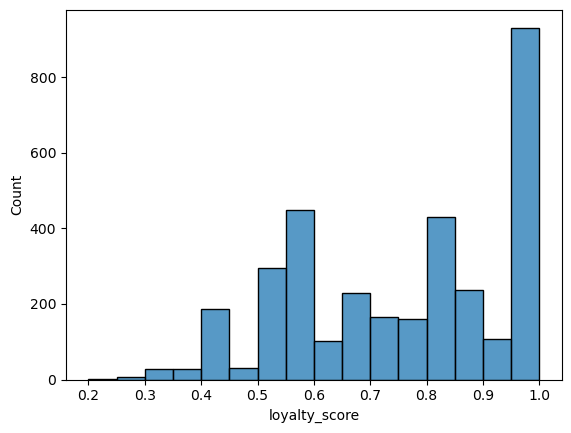

In [50]:
ax = sns.histplot(loyalty_df.loyalty_score, kde=False)

Определение лояльности к определенному бренду

In [51]:
brands_loyalty = loyalty_df.groupby('lovely_brand', as_index=False) \
    .agg({'loyalty_score': 'median', 'user_id': 'count'}) 

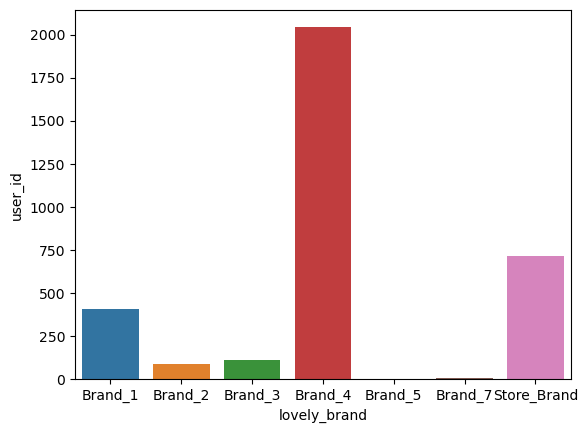

In [52]:
ax = sns.barplot(x="lovely_brand", y="user_id", data=brands_loyalty)

# Вывод

В зависимости от того каким пользователям бренд хочет выдать новые условия выбираем:
1. Самым лояльным с loyalty_score == 1
2. Не самым лояльным loyalty_score > 0.5

Большинство пользователей лояльны только к одну бренду (Brand_4)